#                               Logistic Regression Model

### Lading Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns 

### Load the pre-trained ResNet50 model without the classifier layer

In [ ]:

base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, pooling='avg')

### Preprocess the images

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data = datagen.flow_from_directory('train_directory', target_size=(224, 224), batch_size=32)
test_data = datagen.flow_from_directory('test_directory', target_size=(224, 224), batch_size=32)


### Extract features using the pre-trained model and Flatten them into a 1D array

In [ ]:
train_features = base_model.predict(train_data)
test_features = base_model.predict(test_data)

train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)

### Retrieve the class labels

In [ ]:
train_labels = train_data.classes
test_labels = test_data.classes


### Build and train the model

In [1]:
# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(train_features_flat, train_labels)

# Make predictions on the testing set
predictions = model.predict(test_features_flat)


Found 7978 images belonging to 2 classes.
Found 1277 images belonging to 2 classes.
40/40 [==============================] - 386s 10s/step
Accuracy: 0.9373531714956931


E:\APPS\python app\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

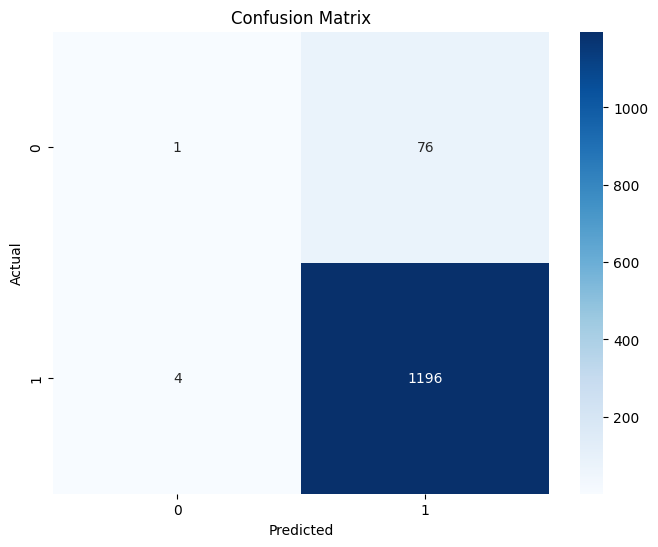

In [9]:
cofus_matrix = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(cofus_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Calculate the metrics of the model

In [12]:
# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(test_labels, predictions, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(test_labels, predictions, average='weighted')
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(test_labels, predictions, average='weighted')
print("F1-score:", f1)

Accuracy: 0.9373531714956931
Precision: 0.8956161995242389
Recall: 0.9373531714956931
F1-score: 0.9107620182648217
